<a href="https://colab.research.google.com/github/Lokesh-006/CodeAlpha_Tech_Intern/blob/main/Dynamic_pricing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

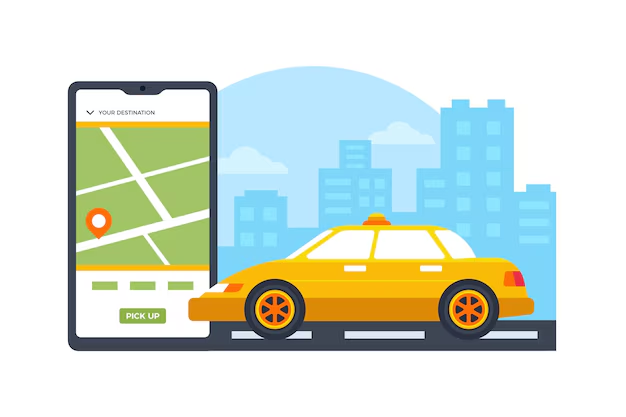

## Introduction

Dynamic pricing is a strategy where businesses adjust the prices of their products or services in real-time based on market demand, supply conditions, and other factors. This project focuses on developing a dynamic pricing model for a ride-hailing service. By analyzing various features related to ride demand, driver availability, and customer behavior, the model aims to optimize pricing strategies to maximize revenue and ensure customer satisfaction.

## Dataset Description

The dataset for this project includes the following features:

- **Number_of_Riders**: The number of customers requesting rides at a given time.
- **Number_of_Drivers**: The number of available drivers in the area.
- **Location_Category**: The type of location (e.g., urban, suburban, rural) where the ride is requested.
- **Customer_Loyalty_Status**: Indicates whether the customer is a loyal customer or a new customer.
- **Number_of_Past_Rides**: The number of rides previously taken by the customer.
- **Average_Ratings**: The average rating given to the driver by the customer.
- **Time_of_Booking**: The time at which the ride is booked.
- **Vehicle_Type**: The type of vehicle requested (e.g., economy, premium, SUV).
- **Expected_Ride_Duration**: The anticipated duration of the ride.
- **Historical_Cost_of_Ride**: The historical cost of similar rides.

## Objective

The primary objective of this project is to develop a dynamic pricing model that adjusts ride prices in real-time based on various influencing factors. The specific goals include:

1. **Price Optimization**: Determine optimal ride prices that balance supply and demand, maximize revenue, and enhance customer satisfaction.
2. **Feature Analysis**: Analyze the impact of different features on ride pricing to understand the key drivers of cost.
3. **Predictive Modeling**: Develop and evaluate machine learning models that can predict the ideal price for a ride based on the provided features.
4. **Customer Insights**: Gain insights into customer behavior and preferences to tailor pricing strategies effectively.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib .pyplot as plt

In [2]:
df = pd.read_csv('/content/sample_data/dynamic_pricing.csv')

In [3]:
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [4]:
df.size

10000

In [5]:
df.shape

(1000, 10)

In [6]:
df.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.2+ KB


In [8]:
df.isnull().any()

Number_of_Riders           False
Number_of_Drivers          False
Location_Category          False
Customer_Loyalty_Status    False
Number_of_Past_Rides       False
Average_Ratings            False
Time_of_Booking            False
Vehicle_Type               False
Expected_Ride_Duration     False
Historical_Cost_of_Ride    False
dtype: bool

In [9]:
import plotly.express as px

In [10]:
fig = px.scatter(df, x = 'Number_of_Riders', y ='Number_of_Drivers', title= 'Number of ride by drivers',trendline = 'ols')
fig.show()

In [11]:
fig = px.scatter(df, x = 'Expected_Ride_Duration', y = 'Historical_Cost_of_Ride',title= 'Expected Ride Duration vs Historical Cost of Ride',trendline = 'ols', )
fig.show()

As expected, there is a linear distribution that shows one variable is directly proportional to the other i.e. ( an increase in expected ride duration will lead to a corresponding increase in the cost of the ride) which makes sense because the longer the trip the more money it will cost.

In [12]:
fig1 = px.box(x = df['Vehicle_Type'], y = df['Historical_Cost_of_Ride'])
fig1.show()

Reading off the median values (middle lines in the box) the cost of a premium vehicle (about 400) is higher than the cost of the economy vehicle (about 330), this is also expected considering factors such as comfort and number of seats the car. (Some ride hailing apps cap the maximum number of riders that can seat a car based on vehicle type).

In [13]:
#plotting a box plot graph for cost of ride against time of booking
fig = px.box(df, x='Time_of_Booking',
             y='Historical_Cost_of_Ride',
             title='Historical Cost of Ride Distribution by Time of Booking')
fig.show()

Reading off the median values (middle lines in the box) the historical cost of a ride is high in the morning (about 380) and highest in the afternoon (about 390) but gets lower in the evening (about 360) and is lowest in the night(about 330), this is expected considering factors such as amount of vehicle traffic during the day: heavy vehicle traffic in the morning and afternoon hours but less traffic in the evening and night time.

In [14]:

fig1 = px.scatter(x = df['Number_of_Past_Rides'], y = df['Historical_Cost_of_Ride'],trendline = 'ols', trendline_color_override= 'black')
fig1.show()

In [16]:
# Select only numeric columns before calculating correlation
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

We can have a look at the correlation matrix of the dataset to get a summarization of relationships between all the variables using a measure of linear association between the two variables of between 0 and 1.

In [17]:
import plotly.graph_objects as go

In [18]:
fig2 = go.Figure(data = go.Heatmap(z=corr_matrix.values,
                                   x = corr_matrix.columns,
                                   y = corr_matrix.columns,
                                   colorscale = 'viridis'))
fig2.update_layout(title = 'Correlation Matrix')
fig2.show()

Implementing a Dynamic Pricing Strategy
The data provided by the company states that the company uses a pricing model that only takes the expected ride duration as a factor to determine the price for a ride. Now, we will implement a dynamic pricing strategy aiming to adjust the ride costs dynamically based on the demand and supply levels observed in the data. It will capture high-demand periods and low-supply scenarios to increase prices, while low-demand periods and high-supply situations will lead to price reductions.

In [19]:
high_demand_percentile = 75
low_demand_percentile = 25

df['demand_multiplier'] = np.where(df['Number_of_Riders'] > np.percentile(df['Number_of_Riders'], high_demand_percentile),
                                    df['Number_of_Riders'] / np.percentile(df['Number_of_Riders'], high_demand_percentile),
                                     df['Number_of_Riders'] / np.percentile(df['Number_of_Riders'], low_demand_percentile))

# Calculate supply_multiplier based on percentile for high and low supply
high_supply_percentile = 75
low_supply_percentile = 25

df['supply_multiplier'] = np.where(df['Number_of_Drivers'] > np.percentile(df['Number_of_Drivers'], low_supply_percentile),
                                     np.percentile(df['Number_of_Drivers'], high_supply_percentile) / df['Number_of_Drivers'],
                                     np.percentile(df['Number_of_Drivers'], low_supply_percentile) / df['Number_of_Drivers'])

# Define price adjustment factors for high and low demand/supply
demand_threshold_high = 1.2  # Higher demand threshold
demand_threshold_low = 0.8  # Lower demand threshold
supply_threshold_high = 0.8  # Higher supply threshold
supply_threshold_low = 1.2  # Lower supply threshold

# Calculate adjusted_ride_cost for dynamic pricing
df['adjusted_ride_cost'] = df['Historical_Cost_of_Ride'] * (
    np.maximum(df['demand_multiplier'], demand_threshold_low) *
    np.maximum(df['supply_multiplier'], supply_threshold_high)
)






In [20]:
df.head(10)

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,demand_multiplier,supply_multiplier,adjusted_ride_cost
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273,1.111111,0.844444,266.710528
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753,1.450000,0.974359,245.653817
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469,1.050000,1.225806,424.478684
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232,1.098765,1.357143,701.155452
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422,1.950000,1.727273,1952.472427
5,59,35,Urban,Silver,83,3.51,Night,Economy,128,339.955361,1.475000,1.085714,544.414227
6,93,43,Suburban,Regular,44,4.41,Afternoon,Premium,16,104.061541,1.148148,0.883721,105.585268
7,62,39,Rural,Gold,83,3.59,Afternoon,Premium,47,235.811864,1.550000,0.974359,356.136379
8,79,14,Rural,Silver,71,3.74,Evening,Economy,128,501.412517,1.975000,2.714286,2687.929246
9,42,6,Rural,Silver,21,3.85,Night,Premium,128,398.993365,1.050000,1.833333,768.062227


In [21]:
df['profit'] = (df['adjusted_ride_cost']-df['Historical_Cost_of_Ride'])
df['profitpercentage'] = ((df['profit']/df['Historical_Cost_of_Ride'])*100)


In [22]:
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride,demand_multiplier,supply_multiplier,adjusted_ride_cost,profit,profitpercentage
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273,1.111111,0.844444,266.710528,-17.546745,-6.172840
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753,1.450000,0.974359,245.653817,71.779065,41.282051
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469,1.050000,1.225806,424.478684,94.683215,28.709677
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232,1.098765,1.357143,701.155452,230.954221,49.118166
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422,1.950000,1.727273,1952.472427,1372.791005,236.818182


We begin by first defining percentiles that represent high and low demand levels. Afterwards we calculate the demand multiplier by comparing the number of riders to these defined percentiles. If the number of riders exceeds the percentile for high demand then the multiplier is set as the number of riders divided by the high-demand percentile. However if the number of riders falls below the percentile for low demand then the demand multiplier is set as the number of riders divided by the low-demand percentile.

The next thing is to defining percentiles that represent high and low supply levels. If the number of drivers exceeds the low-supply percentile, the supply multiplier is set as the high-supply percentile divided by the number of drivers. Otherwise if the number of drivers is below the low-cost supply percentile then the supply multiplier is set as the low-supply percentile divided by the number of drivers.

We conclude by calculating the adjusted ride cost for dynamic pricing where it multiplies the historical cost of the ride by the maximum of the demand multiplier and a lower threshold (demand_threshold_low) and also by the maximum of the supply multiplier and an upper threshold (supply_threshold_high). This multiplication ensures that the adjusted ride cost captures the combined effect of demand and supply multipliers with the thresholds serving as caps or floors to control the price adjustments.

We can now to proceed to calculate the profit percentage when this dynamic pricing strategy is implemented:

In [23]:
# Identify profitable rides
df['Profitable_Ride'] = df['profit'] > 0

In [24]:
# Identify loss rides where profit percentage is negative
loss_rides = df[df['profitpercentage'] < 0]


In [25]:
#ID profitable rides when profit percentage percentage is positive
profitable_rides = df[df['profitpercentage'] > 0]
#calculate the count of profitable and loss rides
profitable_count = len(profitable_rides)
loss_count = len(loss_rides)

In [26]:
#calculate the count of profitable and loss rides
profitable_count = len(profitable_rides)
loss_count = len(loss_rides)
#creating a donut chart to show the distribution of profitable and loss rides using the dynamic pricing strategy
category = ['Profitable Rides', 'Loss Rides']
Count = [profitable_count, loss_count]

In [27]:
fig = go.Figure(go.Funnel(
    y=category,
    x=Count,
    textinfo="value+percent initial",
    marker=dict(color=['fuchsia', 'red'])))  # Assign colors to categories

fig.update_layout(title='Profitability of Rides (Dynamic Pricing vs Historical Pricing) - Funnel Chart')
fig.show()

From the funnel chart above, we can see a resounding 82.7% of all rides implementing dynamic pricing strategy turned out to be profitable rides.

We can now look at the relationship between the expected ride duration and the adjusted cost of the ride based on the dynamic pricing strategy:

In [28]:
fig = px.scatter(df,
                 x='Expected_Ride_Duration',
                 y='adjusted_ride_cost',
                 title='Expected Ride Duration vs. Cost of Ride',
                 trendline='ols')
fig.show()

From the scatter plot above, we are able to see more distribution of cost of the rides on certain durations since more variables have come into play to influence the cost of the ride.

We can now begin to train a machine learning model to aid in the cost of ride prediction using the dynamic pricing strategy. For this project I used a Random Forest Regression Model. First we create a data preprocessing pipeline to preprocess the raw data into a clean, organized and structured format suitable for analysis:

In [29]:
from sklearn.preprocessing import StandardScaler

def df_preprocessing_pipeline(df):
  #ID numeric and categorical features
  numeric_features = df.select_dtypes(include=['float','int']).columns
  categorical_features = df.select_dtypes(include=['object']).columns

  #Handling missing values in numeric features
  df[numeric_features] = df[numeric_features].fillna(df[numeric_features].mean())

  #Detecting and handling outliers in numeric features using IQR
  for feature in numeric_features:
    Q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = q1 - (1.5 * IQR)
    upper_bound = q3 + (1.5 * IQR)
    df[feature] = np.where((df[feature] < lower_bound) | (df[feature] > upper_bound),
                             df[feature].mean(), df[feature])

    #Handling missing values in categories features
    df[categorical_features] = df[categorical_features].fillna(df[categorical_features].mode().iloc[0])

    return df

In [30]:
#Converting vehicle type to a numerical feature
df["Vehicle_Type"] = df["Vehicle_Type"].map({"Premium": 1, "Economy": 0})

In [31]:
#Converting time of booking to a numerical feature
df["Time_of_Booking"] = df["Time_of_Booking"].map({"Afternoon": 0, "Evening": 1, "Morning": 2, "Night": 3})

Next is splitting the data to train the ML model to predict the cost of a ride:

In [32]:
#splitting data to train and test
from sklearn.model_selection import train_test_split
x = np.array(df[["Number_of_Riders", "Number_of_Drivers", "Vehicle_Type", "Time_of_Booking", "Expected_Ride_Duration"]])
y = np.array(df[["adjusted_ride_cost"]])

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

#Reshape y to 1D array
y_train = y_train.ravel()
y_test = y_test.ravel()

#Training a random forest regression model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

We can now input values to test this Machine Learning model:

In [33]:
#testing the ML model using some input values
def get_vehicle_type_numeric(vehicle_type):
  vehicle_type_mapping = {
      "Premium": 1,
      "Economy": 0
  }
  vehicle_type_numeric = vehicle_type_mapping.get(vehicle_type)
  return vehicle_type_numeric

def get_time_of_booking_numeric(time_of_booking):
  time_of_booking_mapping = {
      "Afternoon": 0,
      "Evening": 1,
      "Morning": 2,
      "Night": 3
  }
  time_of_booking_numeric = time_of_booking_mapping.get(time_of_booking)
  return time_of_booking_numeric


In [34]:
#making predictions using user input values
def predict_price(number_of_riders, number_of_drivers, vehicle_type, time_of_booking, Expected_Ride_Duration):
  vehicle_type_numeric = get_vehicle_type_numeric(vehicle_type)
  if vehicle_type_numeric is None:
    raise ValueError("Invalid vehicle type")

  time_of_booking_numeric = get_time_of_booking_numeric(time_of_booking)
  if time_of_booking_numeric is None:
    raise ValueError("Invalid time of booking")

  input_data = np.array([[number_of_riders, number_of_drivers, vehicle_type_numeric, time_of_booking_numeric, Expected_Ride_Duration]])
  predicted_price = model.predict(input_data)
  return predicted_price

In [35]:
#User input example
user_number_of_riders = 65
user_number_of_drivers = 30
user_vehicle_type = "Economy"
user_time_of_booking = "Afternoon"
Expected_Ride_Duration = 50
predicted_price = predict_price(user_number_of_riders, user_number_of_drivers, user_vehicle_type, user_time_of_booking, Expected_Ride_Duration)
print("The predicted price for the ride is:", predicted_price)

The predicted price for the ride is: [406.40493515]


In [36]:
#model prediction
y_pred = model.predict(x_test)

#checking model accuracy
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)*100

85.89638634544298

The model has an accuracy of 86%, certainly not the only performance metric to be considered when testing a model (there’s precision and recall too when a confusion matrix is used in a classification model) nor its’ optimal performance level as the accuracy can be increased further by taking certain steps like hyperparameter tuning and increasing the amount of data samples in the training data. However with the recorded accuracy the results derived are still viable and in accordance to the influencing variables used to make the prediction.

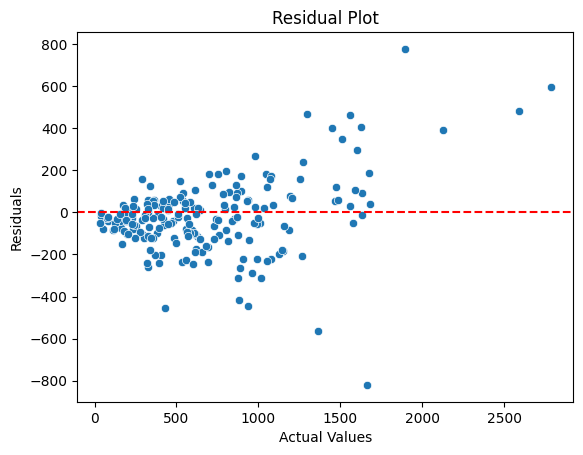

In [37]:
# Calculate residuals
residuals = y_test.flatten() - y_pred

# Create a residual plot
sns.scatterplot(x=y_test.flatten(), y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

In [38]:
#predict on the test set
y_pred = model.predict(x_test)

#create a scatter plot with actual vs predicted values
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=y_test.flatten(),
    y=y_pred,
    mode='markers',
    name='Actual vs Predicted'
))

#Add a line representing the ideal case
fig.add_trace(go.Scatter(
    x=[min(y_test.flatten()), max(y_test.flatten())],
    y=[min(y_test.flatten()), max(y_test.flatten())],
    mode='lines',
    name='Ideal',
    line=dict(color='red', dash='dash')
))

fig.update_layout(
    title='Actual vs Predicted Values',
    xaxis_title='Actual Values',
    yaxis_title='Predicted Values',
    showlegend=True
)

fig.show()

### Conclusion

In this dynamic pricing project for a ride-hailing service, we developed a machine learning model that successfully predicts and adjusts ride prices based on a variety of real-time factors. This model achieved an R2 score of 86.57, indicating a strong correlation between the predicted prices and the actual prices, and demonstrating the effectiveness of the model in capturing the underlying patterns in the data.

